In [4]:
import pandas as pd
import numpy as np
import umap
import sys
sys.path.insert(1, "/home/robbe/ionbot")
import OxiAnalysis as OA
import matplotlib.pyplot as plt
import seaborn as sns
import umap.plot

## Unsupervised

In [2]:
data = pd.read_csv("data.csv")
X = data.copy()
y = X.pop("Unnamed: 0")
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)


In [3]:
mapper = umap.UMAP().fit(X_scaled)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

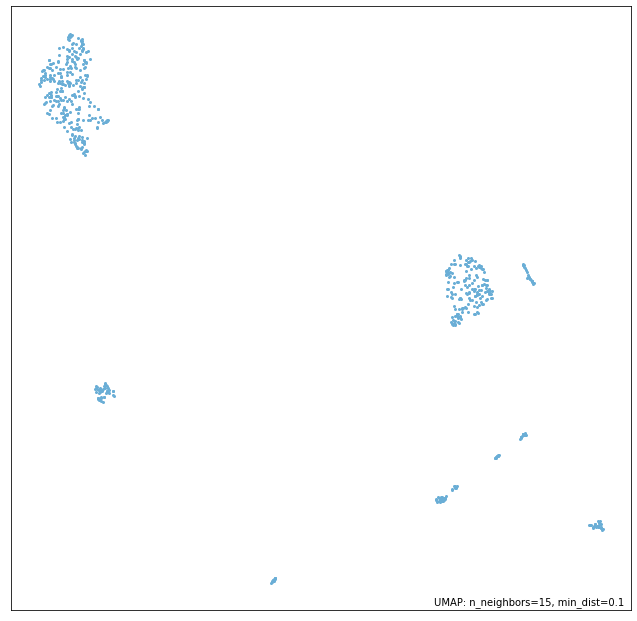

In [6]:
umap.plot.points(mapper)

In [7]:
Project = pd.read_csv("/home/robbe/ionbot/PCA_ML/pca_df_with_ann2.csv", sep=";", decimal=",")["Project"]

<AxesSubplot:>

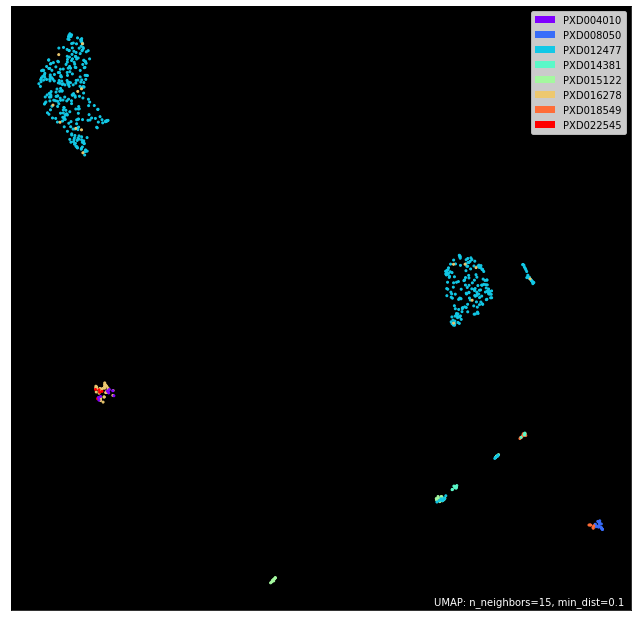

In [12]:
umap.plot.points(mapper, labels=Project, theme="fire")

In [13]:
treatment =  pd.read_csv("/home/robbe/ionbot/PCA_ML/pca_df_with_ann2.csv", sep=";", decimal=",")["Treatment"]

<AxesSubplot:>

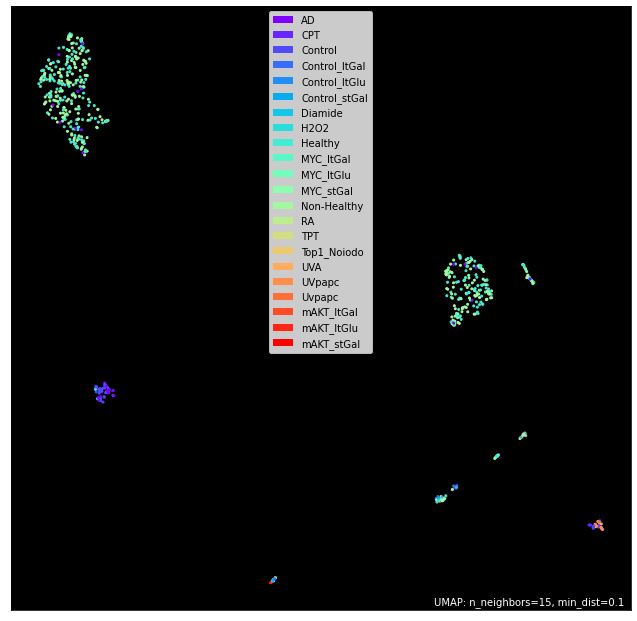

In [14]:
umap.plot.points(mapper, labels=treatment, theme="fire")

In [15]:
Timepoint = pd.read_csv("/home/robbe/ionbot/PCA_ML/pca_df_with_ann2.csv", sep=";")["Timepoint"]

In [18]:
Timepoint = Timepoint.replace(np.nan, "NA")

<AxesSubplot:>

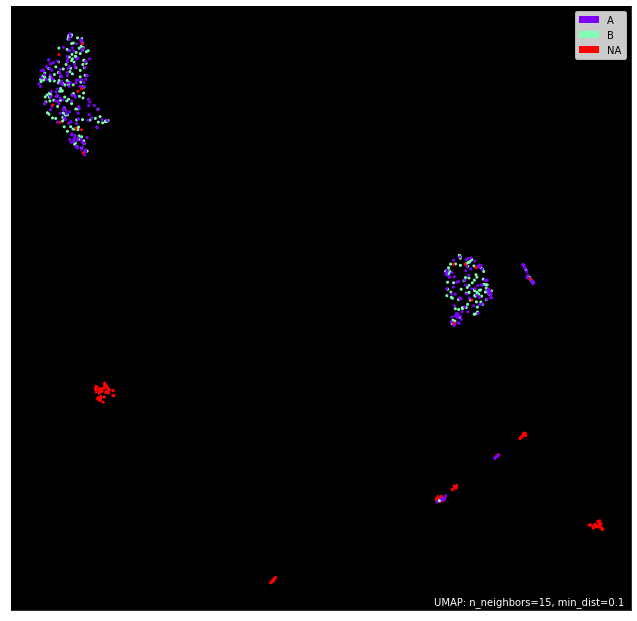

In [19]:
umap.plot.points(mapper, labels=Timepoint, theme="fire")

## Semi-Supervised 

In [ ]:
treatmentdf = pd.DataFrame()

In [27]:
treatment

0      mAKT_ltGal
1      mAKT_ltGal
2      mAKT_stGal
3      mAKT_stGal
4      mAKT_ltGlu
          ...    
636       Control
637       Diamide
638       Control
639       Control
640       Diamide
Name: Treatment, Length: 641, dtype: object

In [28]:
embedding = umap.UMAP().fit_transform(X_scaled, y=treatment)

ValueError: could not convert string to float: 'mAKT_ltGal'